In [699]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

Step 1. Open the data file and study the general information

In [700]:
df = pd.read_csv("/content/drive/MyDrive/1. Full Projects/Practicum/Global Game Sales - SEDA/games.csv")
df.columns = df.columns.str.lower()

In [701]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [702]:
pd.DataFrame({'Count': df.count(),
              '% Missing': round(df.isnull().sum() / len(df) * 100, 2),
              "Unique": df.nunique(),
              'Type':df.dtypes})

,Count,% Missing,Unique,Type
name,16713,0.01,11559,object
platform,16715,0.00,31,object
year_of_release,16446,1.61,37,float64
genre,16713,0.01,12,object
na_sales,16715,0.00,402,float64
eu_sales,16715,0.00,307,float64
jp_sales,16715,0.00,244,float64
other_sales,16715,0.00,155,float64
critic_score,8137,51.32,82,float64
user_score,10014,40.09,96,object


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [704]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [705]:
round(df.isna().sum() / len(df), 4)

name               0.0001
platform           0.0000
year_of_release    0.0161
genre              0.0001
na_sales           0.0000
eu_sales           0.0000
jp_sales           0.0000
other_sales        0.0000
critic_score       0.5132
user_score         0.4009
rating             0.4048
dtype: float64

In [706]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [707]:
for col in df.select_dtypes(include='object'):
  print(col)
  print(df[col].unique())

name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
user_score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' 

# Data Conclusion
- year_of_release and critic_score should be integer
- user_score should be float
- Some na values in name, genre, year_of_release - probably drop after investigation as its less than 2% of dataset
- Many na values in critic_score, user_score, rating - could be imputed depending on correlations and distributions
- To Be Decided (TBD) values in user_score needs to be dealt with
- Major skewness in year_of_release and sales columns 
- Critic and user scores are on different scales but we can convert them for plotting compairson

Once datatypes are changed we will have:
- 3 nominal categorical columns (name, genre, platform)
- 1 Ordinal categorical columns (rating)
- 6 continuous numeric columns (year_of_release, na_sales, eu_sales, jp_sales, other_sales, user_score)
- 2 discrete numeric column (year_of_release, critic_score)
- Name and Genre columns missing 2 values 

# Step 2. Prepare the data
- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
- Explain why you filled in the missing values as you did or why you decided to leave them blank.
- Why do you think the values are missing? Give possible reasons.
- Pay attention to the abbreviation TBD (to be determined). Specify how you - intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and - put these values in a separate column.

In [708]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [709]:
# df[df['name'].isna()]
# df[df['genre'].isna()]
df = df[df['name'].notnull()]

- Let's try and salavage a few release years

In [710]:
import re
# df['year_of_release'].value_counts()
# df[df['name'].str.contains('99')]

pattern = '20\d\d|0[1-9]|20|99|11'
print('Number of NA Values In year_of_released Column:', df['year_of_release'].isna().sum())
print('Number of Names Which Feature A Year In The Title:', df[df['year_of_release'].isna()]['name'].str.contains(pattern).sum())

mask = df['year_of_release'].isnull() 
df.loc[mask, 'year_of_release'] = df[df['year_of_release'].isna()]['name'].str.findall(pattern).str.join('')

Number of NA Values In year_of_released Column: 269
Number of Names Which Feature A Year In The Title: 25


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [711]:
# df[df['year_of_release'] == '']['total_sales'].hist()
df = df[df['year_of_release'] != '']

In [712]:
df.loc[df['year_of_release'] == '99', 'year_of_release'] = 1998
df.loc[df['year_of_release'] == '06', 'year_of_release'] = 2015
df.loc[df['year_of_release'] == '07', 'year_of_release'] = 2016
df.loc[df['year_of_release'] == '11', 'year_of_release'] = 2010
df.loc[df['year_of_release'] == '20', 'year_of_release'] = 1999

df = df[df['year_of_release'].notnull()]
df['year_of_release'] = df['year_of_release'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


- After some investigation I saw that most games with a year in the title are released the year before
- In the end we salvaged 25 accurate release years with this technuique 
- Dropped the rest the rest as its very little of the total data
- Converted column to integer as year_of_release is a discrete value in this dataframe

In [713]:
df['total_sales'] = df.loc[:, ['na_sales',	'eu_sales',	'jp_sales',	'other_sales']].sum(axis=1)

In [714]:
df.groupby('year_of_release')['total_sales'].agg(['min', 'median', 'mean', 'max', 'sum'])

,min,median,mean,max,sum
year_of_release,,,,,
1980,0.23,0.770,1.264444,4.31,11.38
1981,0.13,0.465,0.775652,4.50,35.68
1982,0.14,0.540,0.802222,7.81,28.88
1983,0.16,0.770,0.988235,3.20,16.80
1984,0.27,1.485,3.596429,28.31,50.35
1985,0.02,1.015,3.853571,40.24,53.95
1986,0.30,1.360,1.765714,6.50,37.08
1987,0.07,0.885,1.356250,4.38,21.70
1988,0.03,1.510,3.147333,17.28,47.21


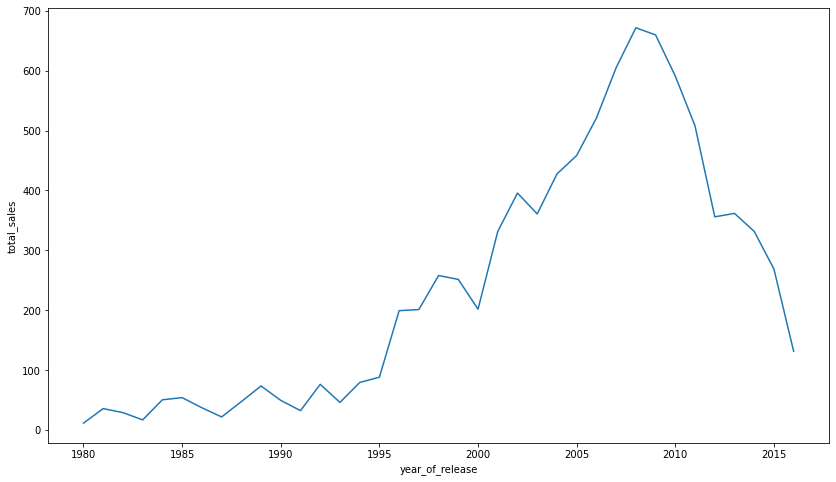

In [715]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='total_sales', estimator=np.sum, ci=None)
plt.show()

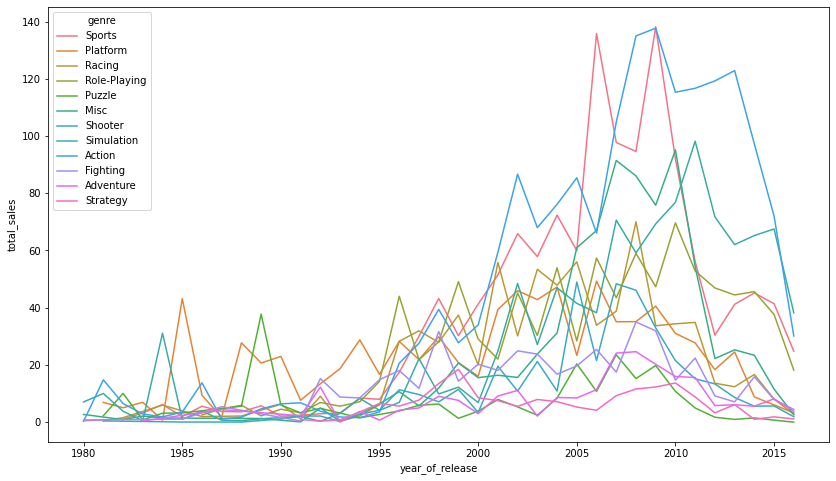

In [716]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='total_sales', hue='genre', estimator=np.sum, ci=None)
plt.show()

- downward trend begins around 2009-2010 
- Some genres suffer more than others
- For the forecast we can can chop off either < 2010 or < 2013
- Lets first go with 2010 so we can investigate what is casuing the initial drop
- We can then further slice at 2013 to narrow in on analysis

# Let's start looking at score and rating distributions
- first we need to deal with 'tbd' as we can plot this column
- Let's get a sense of how to fill the missing values
- Distributions and subsamples

In [717]:
df['user_score_clean'] = pd.to_numeric(df['user_score'], errors='coerce')

In [718]:
def dist_plots(df, col, trigger):
    plt.subplots(2,2,figsize=(15,6))
    
    plt.subplot(1,3,1)
    sns.histplot(df[col], bins=20)
    plt.xlabel(col)
    plt.ylabel(ylabel='Count', fontsize=14)
    plt.xlabel(col+'Hist')
    if trigger:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      plt.axvline(ymin=0, ymax=1, x=(Q3 - 1.5 * IQR), color='red')
      plt.text((Q3 - 1.5 * IQR) + (Q3 - 1.5 * IQR) / 10 , 1200, '1.5 * IQR', color='red')

    print()
    plt.subplot(1,3,2)
    scipy.stats.probplot(df[col], dist="norm", plot=plt)
    plt.ylabel(col)
    plt.xlabel(col+"Probplot")
 
    plt.subplot(1,3,3)
    sns.boxplot(y = df[col])
    plt.ylabel(col)
    plt.xlabel(col+"Boxplot")
    
    
    # plt.subplots_adjust(hspace=0.3)
    print(col+'Skewness:', df[col].skew())
    plt.show()


user_score_cleanSkewness: -1.257219058055837


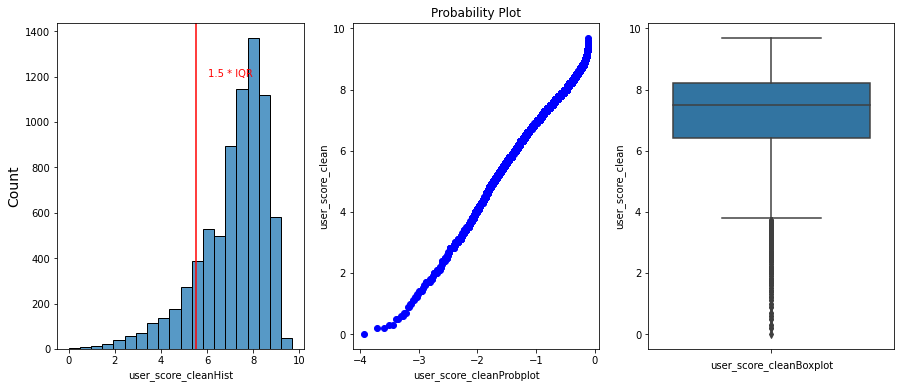

In [719]:
dist_plots(df, 'user_score_clean', True)

In [723]:
w, p = stats.shapiro(df['user_score_clean'].dropna())

w

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.9076645970344543

- Going to extend the trim of this column to 4 points rather than 1.5 * IQR 

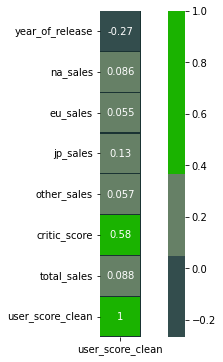

In [657]:
plt.figure(figsize=(10,6))
y_colors=[(0.2,0.3,0.3),(0.4,0.5,0.4),(0.1,0.7,0),(0.1,0.7,0)]

sns.heatmap(df.corr().iloc[:, 7:8], cmap=y_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), annot=True)

In [658]:
print(len(df))
df = df[df['user_score_clean'] > 4]
print(len(df))
print(df.isna().sum())
print('tbd value count:', len(modern[modern['user_score'] == 'tbd']))

16469
7112
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score        493
user_score            0
rating               81
total_sales           0
user_score_clean      0
dtype: int64
tbd value count: 0



user_score_cleanSkewness: -0.6764169106425518


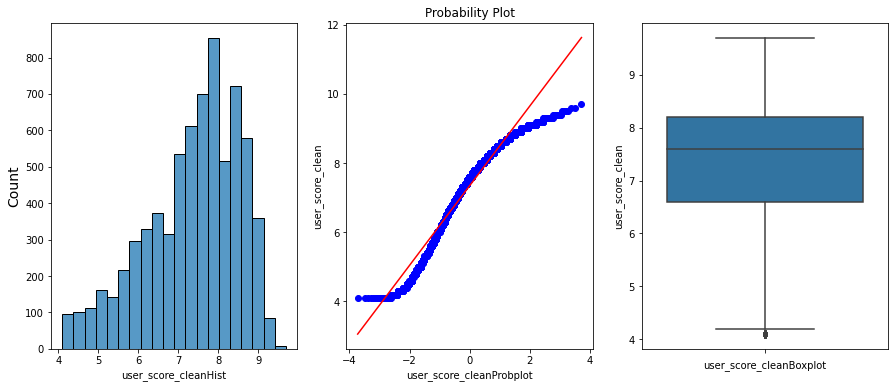

In [659]:
dist_plots(df, 'user_score_clean', False)


critic_scoreSkewness: -0.6172109146043112


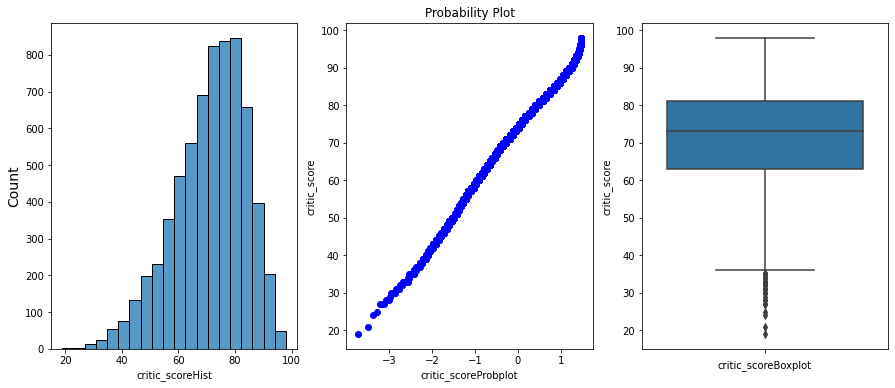

In [660]:
dist_plots(df, 'critic_score', False)

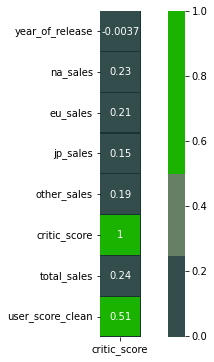

In [661]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr().iloc[:, 5:6], cmap=y_colors, square=True, linewidth=0.1, linecolor=(0.1,0.2,0.2), annot=True)

In [662]:
df['critic_score_scaled'] = df['critic_score'].apply(lambda x: x / 10)

(1980.0, 2016.0)

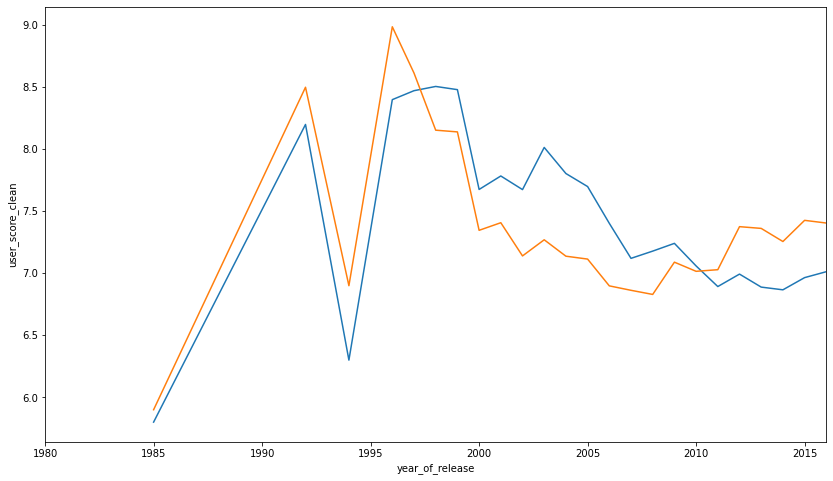

In [606]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year_of_release', y='user_score_clean', estimator=np.mean, ci=None)
sns.lineplot(data=df, x='year_of_release', y='critic_score_scaled', estimator=np.mean, ci=None)
plt.xlim(1980, 2016, 2)

In [666]:
df['critic_score_scaled'] = df.groupby('user_score')['critic_score_scaled'].transform(lambda x: x.fillna(x.round().mean()))

In [669]:
df.drop(['user_score_clean', 'critic_score'], axis=1, inplace=True)

- User score and critic score are highly correlated
- We cant use a groupby of one to fill the other due to NaN's
- We can however use it fill the 'tbd' values 
  - But first lets visualize the mean/median of the score correlation
  - To do so lets bring the scoring columns into the same scale

- Lets drop entries before 2010 as its interesting but irrelevant for the forecasting objective
- it also looks like using the earliers years will effect the averages as well
- Lets then replace the 'tbd' values using np.where and a groupby

In [670]:
print(len(df))

modern = df[df['year_of_release'] > 2010]

print(len(modern))

7112
1881


In [671]:
df.isna().sum()

name                    0
platform                0
year_of_release         0
genre                   0
na_sales                0
eu_sales                0
jp_sales                0
other_sales             0
user_score              0
rating                 81
total_sales             0
critic_score_scaled     1
dtype: int64

In [673]:
import math
import numpy as np
import seaborn as sns
from collections import Counter
import scipy.stats as ss
import matplotlib.pyplot as plt



def entropy(X):
  e = 0.
  total = len(X)
  if total <= 1:
      return 0
  # loop through each labels count 
  for num in Counter(X).values():
      # p(num) for each num in X_counter.values
      p = num/total
      # Calculate and aggregate the entropy for each unique label count
      e -= p * math.log2(p)
  return e 


def conditional_entropy(X, Y):
    # entropy of x given y
    y_counter = Counter(Y)
    # Counting the number of insrtances of each unique combination 
    xy_counter = Counter(list(zip(X, Y)))
    # Total occurances to calulate probability
    total_occurrences = sum(y_counter.values())
    c_entropy = 0
    # for each combination
    for xy in xy_counter.keys():
        # probability of label combination equals number of instances of each combination / total length
        p_xy = xy_counter[xy] / total_occurrences
        # probability 
        p_y = y_counter[xy[1]] / total_occurrences
        c_entropy += p_xy * math.log(p_y/p_xy)
    return c_entropy


# Theil's U is a measure of nominal association and is based on the concept of information entropy
def theil_u(X, Y):
    ce_xy = conditional_entropy(X, Y)
    # count of x labels
    x_counter = Counter(X)
    # total feature count
    total_occurrences = sum(x_counter.values())
    # mapping the p(x) for each x_label to a list
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    # scipy stats entropy
    e_x = ss.entropy(p_x, base=2)
    if e_x == 0:
        return 1
    else:
        return round((e_x - ce_xy) / e_x,5)

In [681]:
lab = []
lab_2 = []
t_u = []

for label in modern.select_dtypes(include='object').dropna(how='all'):
  for label_2 in modern.select_dtypes(include='object').dropna(how='all'):
    if label != label_2:
      lab.append(label)
      lab_2.append(label_2)
      t_u.append(theil_u(modern[label], modern[label_2]))

data = pd.DataFrame({'column_1': lab, 'column_2': lab_2, 'score':t_u})

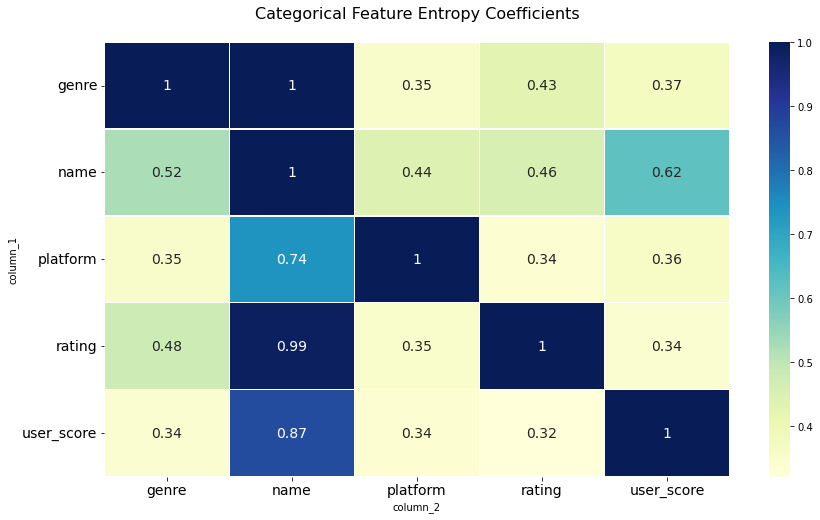

In [682]:
plt.figure(figsize=(14,8))
crosstab = pd.crosstab(data['column_1'], data['column_2'], values=data['score'], aggfunc='sum').fillna(1)
# matrix = np.triu(crosstab)
ax = sns.heatmap(crosstab, vmin=crosstab.values.min(), vmax=1, square=False, cmap="YlGnBu", linewidths=0.1, annot=True, annot_kws={"fontsize":14}) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.title("Categorical Feature Entropy Coefficients\n", fontsize=16)
plt.show()

# Not lets look at sales distributions

(2010.0, 2016.0)

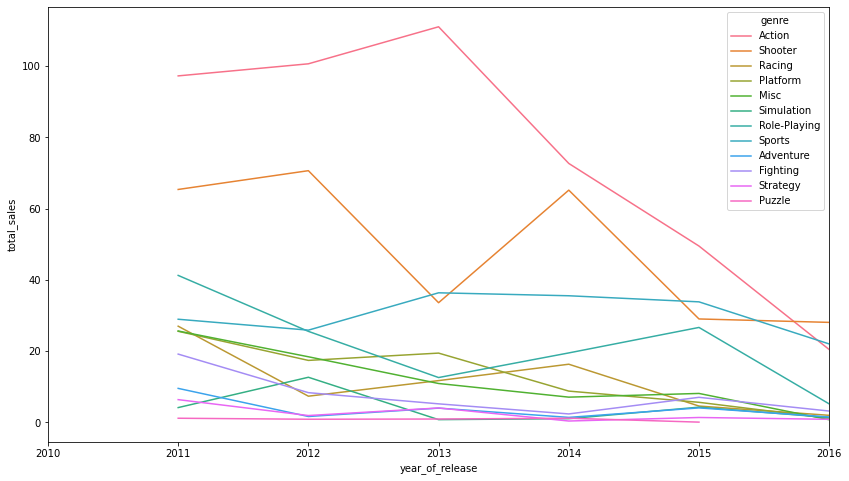

In [678]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=modern, x='year_of_release', y='total_sales', hue='genre', estimator=np.sum, ci=None)
plt.xlim(2010, 2016, 2)

(1980.0, 2016.0)

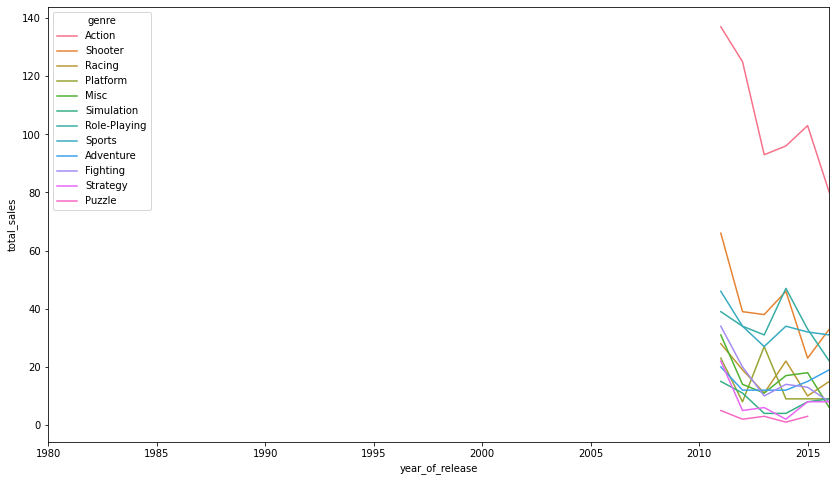

In [680]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=modern, x='year_of_release', y='total_sales', hue='genre', estimator='count', ci=None)
plt.xlim(1980, 2016, 2)

In [ ]:
df[df['total_sales'] < 1]

In [ ]:
df[df['total_sales'] > 1]

In [735]:
new = df[df['critic_score'].notnull()]

In [736]:
def correlation_ratio(categories, values):
    cat = np.unique(categories, return_inverse=True)[1]
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for i in np.unique(cat):
        subgroup = values[np.argwhere(cat == i).flatten()]
        ssw += np.sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))**.5



coef = correlation_ratio(new['genre'], new['critic_score'])

In [737]:
coef

0.16826418644441576